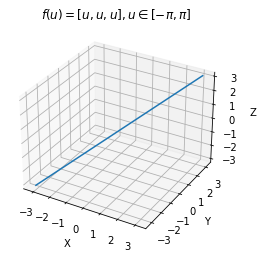

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splder, splprep, splrep, BSpline
from brainlit.algorithms.generate_fragments import spline_fxns

# define the paremeter space
theta = np.linspace(-np.pi, np.pi)
# define f(u)
X = theta
Y = X
Z = Y
# define df(u)
dX = np.ones(len(theta))
dY = dX
dZ = dX
# define ddf(u)
ddX = np.zeros(len(theta))
ddY = ddX
ddZ = ddY

C = [X, Y, Z]
dC = [dX, dY, dZ]
ddC = [ddX, ddY, ddZ]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot(X, Y, Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(r"$f(u) = [u, u, u], u \in [-\pi, \pi]$")
plt.show()

In [2]:
tck, u = splprep(C, u=theta, k=2)
t = tck[0]
c = tck[1]
k = tck[2]

curvature = spline_fxns.curvature(theta, t, c, k)
print(curvature)

deriv = np.array([dX, dY, dZ]).T
dderiv = np.array([ddX, ddY, ddZ]).T
cross = np.cross(deriv, dderiv)
# evalute the curvature
num = np.linalg.norm(cross, axis=1)
denom = np.linalg.norm(deriv, axis=1) ** 3
curvature = np.nan_to_num(num / denom)
print(curvature)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


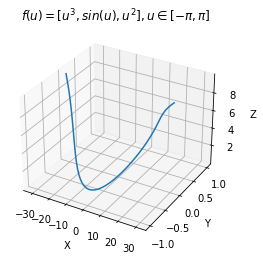

In [3]:
# define the paremeter space
theta = np.linspace(-np.pi, np.pi)
# define f(u)
X = theta**3
Y = np.sin(theta)
Z = theta**2
# define df(u)
dX = 2*theta**2
dY = np.cos(theta)
dZ = 2*theta
# define ddf(u)
ddX = 4*theta
ddY = -np.sin(theta)
ddZ = 2 * np.ones(len(theta))

C = [X, Y, Z]
dC = [dX, dY, dZ]
ddC = [ddX, ddY, ddZ]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot(X, Y, Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(r"$f(u) = [u^3, sin(u), u^2], u \in [-\pi, \pi]$")
plt.show()

[ 0.00221041  0.00261053  0.00307455  0.00362136  0.00427767  0.00508104
  0.00608389  0.00735905  0.0090074   0.0111687   0.01403646  0.01787763
  0.02305575  0.0300498   0.03944237  0.05180015  0.06724584  0.08425486
  0.09684729  0.08986732  0.03785439 -0.07052308 -0.17261813 -0.16009324
 -0.07184141 -0.07184141 -0.16009324 -0.17261813 -0.07052308  0.03785439
  0.08986732  0.09684729  0.08425486  0.06724584  0.05180015  0.03944237
  0.0300498   0.02305575  0.01787763  0.01403646  0.0111687   0.0090074
  0.00735905  0.00608389  0.00508104  0.00427767  0.00362136  0.00307455
  0.00261053  0.00221041]


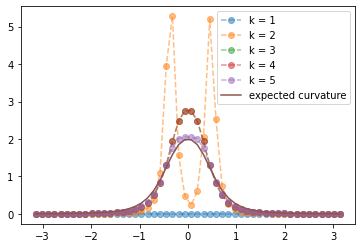

In [5]:
for k in [1, 2, 3, 4, 5]:
    tck, u = splprep(C, u=theta, k=k)
    t = tck[0]
    c = tck[1]
    k = tck[2]
    curvature = spline_fxns.curvature(theta, t, c, k)
    plt.plot(theta, curvature, "o--", alpha=0.5,  label="k = %d" % k)

expected_deriv = np.array([dX, dY, dZ]).T
expected_dderiv = np.array([ddX, ddY, ddZ]).T
cross = np.cross(expected_deriv, expected_dderiv)
# evalute the curvature
num = np.linalg.norm(cross, axis=1)
denom = np.linalg.norm(expected_deriv, axis=1) ** 3
expected_curvature = np.nan_to_num(num / denom)

plt.plot(theta, expected_curvature, label="expected curvature")
plt.legend()